Titanic Classification :
Make a system which tells whether the person will be save from sinking. What factors were
most likely lead to success-socio-economic
status, age, gender and more.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

### Load and examine the dataset

In [18]:
data = pd.read_csv('../BharathInternProjects/train.csv')

### Handle missing values

In [19]:
data.drop(columns=['Cabin'], inplace=True)
data.dropna(subset=['Survived'], inplace=True)


### Encode categorical variables

In [20]:
encoder = OneHotEncoder()
encoded_sex = encoder.fit_transform(data[['Sex']])
encoded_embarked = encoder.fit_transform(data[['Embarked']])
data.drop(columns=['Sex', 'Embarked'], inplace=True)
data = pd.concat([data, pd.DataFrame(encoded_sex.toarray(), columns=['female', 'male']), pd.DataFrame(encoded_embarked.toarray()[:, :2], columns=['C', 'Q'])], axis=1)

### Feature scaling

In [21]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = scaled_features

### Create feature matrix X_imputed and target variable y


In [22]:
X_imputed = data.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'])
y = data['Survived']


### Impute missing values in X_imputed


In [23]:
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X_imputed)

### Split the imputed data


In [24]:
X_train_imputed, X_test_imputed, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


### Impute missing values in y_train


In [25]:
imputer_y = SimpleImputer(strategy='most_frequent')
y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1))
y_train_imputed = y_train_imputed.flatten()


### Model Selection and Training


In [26]:
model = RandomForestClassifier()
model.fit(X_train_imputed, y_train_imputed)


RandomForestClassifier()

### Model Evaluation


In [27]:
y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [28]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.8044692737430168
Precision: 0.782608695652174
Recall: 0.7297297297297297
F1-Score: 0.7552447552447553
ROC-AUC: 0.7934362934362935


### Feature Importance Visualization


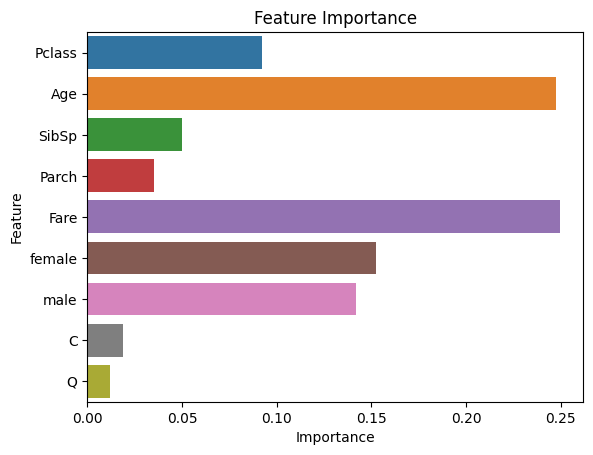

In [29]:
sns.barplot(x=model.feature_importances_, y=data.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket']).columns)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()